# Comparing Antenna Panel Calculations with Matlab
Compare the results with the equivalent Matlab code "MatlabFiles/AntennaPanel.mlx". [Here](MatlabFiles/AntennaPanel.html) is the execution results of this code in Matlab.

In [1]:
import numpy as np
import scipy.io
import time

import neoradium as nr
# Note: See the "AntennaPanel.mlx" file in the "MatlabFiles" directory and compare with the 
# following results.

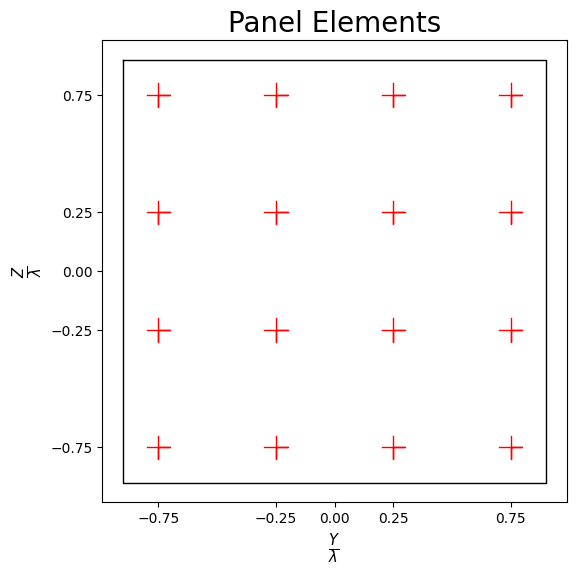

In [2]:
# We first create an antenna element template. The antenna panel class "AntennaPanel" uses this
# template to create the elements of the panel.
elementTemplate = nr.AntennaElement(beamWidth=[65,65], maxAttenuation=30)

# Now we can create the antenna panel using the antenna element template. Note that the spacing between the
# elements is 0.5𝜆 by default.
panel = nr.AntennaPanel([4,4], elements=elementTemplate, polarization="+")

# The "showElements" method draws the antenna panel showing all the elements.
panel.showElements(zeroTicks=True)


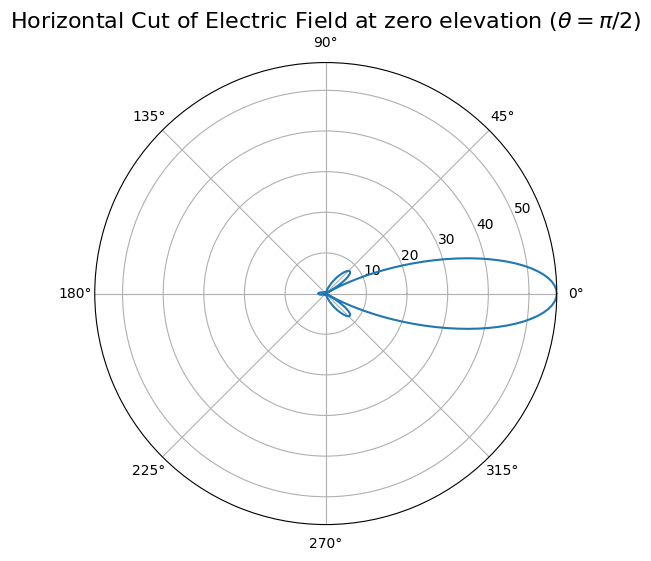

(np.float64(1.3461163449353218e-16),
 np.float64(56.83750173730888),
 array([53.76686552, 54.85766752, 55.71739482, 56.33761657, 56.71222024,
        56.83750174, 56.71222024, 56.33761657, 55.71739482, 54.85766752]))

In [3]:
# Depending on the input parameters the "drawRadiation" method can create different types of graphs. Here
# we draw the Field values of the antenna panel at the horizontal plane of zero elevation.
radValues = panel.drawRadiation(theta=90, viewAngles=(90,0), radiationType="Field", normalize=False)

# We can print a selected portion of the field values returned by this function and compare the results
# with Matlab.
radValues.min(),radValues.max(),radValues[175:185]

Expected (from Matlab):
```
array([53.76686552, 54.85766752, 55.71739482, 56.33761657, 56.71222024,
       56.83750174, 56.71222024, 56.33761657, 55.71739482, 54.85766752]))
```

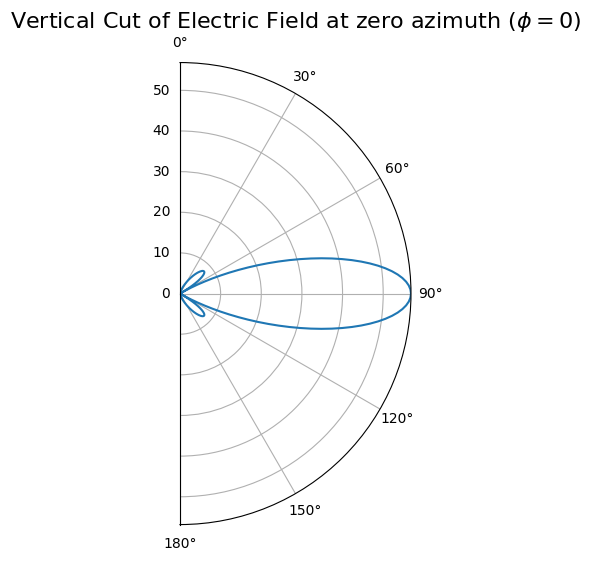

(np.float64(2.584305117453359e-16),
 np.float64(56.83750173730888),
 array([7.77330424, 7.94472821, 8.03364825, 8.04789381, 7.99526854,
        7.88346163, 7.71996913, 7.51202565, 7.26654655, 6.99008022]))

In [4]:
# Here the "drawRadiation" method is used to draw the Field values in the vertical plane at azimuth angle 0.
radValues = panel.drawRadiation(phi=0, radiationType="Field", normalize=False)

# Print a selected portion of the field values and compare the results with Matlab. 
radValues.min(),radValues.max(),radValues[130:140]

Expected (from Matlab):
```
array([7.77330424, 7.94472821, 8.03364825, 8.04789381, 7.99526854,
       7.88346163, 7.71996913, 7.51202565, 7.26654655, 6.99008022]))
```

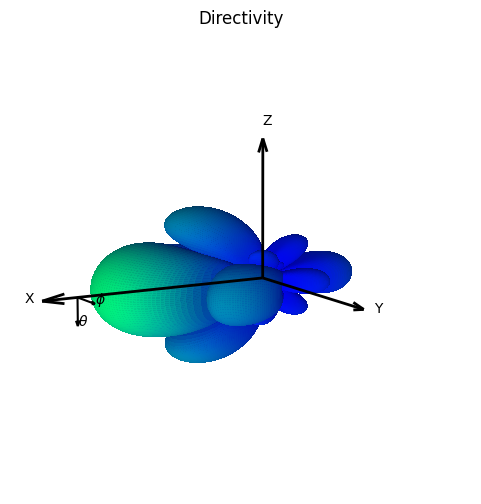

Time: 2.6720311641693115


(np.float64(-120.0),
 np.float64(17.867890470891137),
 array([17.38548524, 17.55993762, 17.6950069 , 17.79116026, 17.84872386,
        17.86789047, 17.84872386, 17.79116026, 17.6950069 , 17.55993762]))

In [5]:
# Here the "drawRadiation" method is used to draw a 3D graph of directivity.
t0 = time.time()
radValues = panel.drawRadiation(radiationType="Directivity", normalize=True, viewAngles=(60,10))
print("Time:", time.time()-t0)
# Print a selected portion of the directivity values and compare the results with Matlab. 
radValues.min(),radValues.max(),radValues[85:95,180]

Expected (from Matlab):
```
array([17.38548524, 17.55993762, 17.6950069 , 17.79116026, 17.84872386,
       17.86789047, 17.84872386, 17.79116026, 17.6950069 , 17.55993762]))
```

In [6]:
# Comparing the directivity calculations with Matlab
directivity = panel.getDirectivity()

# Read the file created by Matlab for "directivity" values
directivityMatlab = scipy.io.loadmat('MatlabFiles/PanelDirectivity.mat')['directivity']
directivityMatlab = directivityMatlab[:-1,:-1]
directivityMatlab = np.maximum(-120, directivityMatlab) # We clip the minumum to -120 db (linearly to 1e-12)
assert directivityMatlab.shape==directivity.shape
print("Shape of Directivity results:", directivity.shape)
print("Maximum difference between the results:", np.abs(directivity-directivityMatlab).max())


Shape of Directivity results: (180, 360)
Maximum difference between the results: 1.6200374375330284e-11


In [7]:
# Comparing the field calculations with Matlab
field = panel.getField()

# Read the file created by Matlab for "field" values
fieldMatlab = scipy.io.loadmat('MatlabFiles/PanelField.mat')['field']
fieldMatlab = fieldMatlab[:-1,:-1]
assert fieldMatlab.shape==field.shape
print("Shape of Field values:", field.shape)
print("Maximum difference between the results:", np.abs(field-fieldMatlab).max())


Shape of Field values: (180, 360)
Maximum difference between the results: 4.263256414560601e-14


In [8]:
# Comparing the power calculations with Matlab
powerDb = panel.getPowerPatternDb()

# Read the file created by Matlab for "powerDb" values
powerDbMatlab = scipy.io.loadmat('MatlabFiles/PanelPowerDb.mat')['powerDb']
powerDbMatlab = powerDbMatlab[:-1,:-1]
powerDbMatlab = np.maximum(-120, powerDbMatlab)             # We clip the minumum to -120 db (linearly to 1e-12)
assert powerDbMatlab.shape==powerDb.shape
print("Shape of power values:", powerDb.shape)
print("Maximum difference between the results:", np.abs(powerDb-powerDbMatlab).max())


Shape of power values: (180, 360)
Maximum difference between the results: 1.6186163520615082e-11
